In [5]:
#Pandas, Numpy importieren
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sl
import scipy.stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

#Importeieren der Modelle aus verschiedenen Bibliotheken
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import GLS
from linearmodels.panel import PooledOLS


# Splitting data into training and testing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.model_selection import train_test_split

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 600)

# Matplotlib visualization
%matplotlib inline
# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize
#figsize(6, 6)

# Seaborn for visualization
sns.set(font_scale = 2)

In [6]:
data = pd.read_csv('../../data/all_nan.csv')
data.head()

,LOCATION,SUBJECT,TIME,PISA Math,PISA Read,PISA Science,GINI,MIGRANTS,STR_SRY,GDP,EDU_SPENDING,CPI,ALC_PC,INTERNET_PC,PCT_EDU_TRY,HOMICIDES
0,AUS,TOT,2003.0,524.0,525.0,NaN,0.3260,23.618490,NaN,32245.447585,16.058967,88.0,10.3,60.00,31.314152,1.538919
1,AUS,TOT,2006.0,520.0,513.0,527.0,0.3260,24.557012,NaN,37844.782088,16.069185,87.0,10.8,64.00,33.022213,1.368975
2,AUS,TOT,2009.0,514.0,515.0,527.0,0.3260,26.047489,NaN,41615.326657,16.079402,87.0,10.7,75.46,36.881355,1.209148
3,AUS,TOT,2012.0,504.0,512.0,521.0,0.3260,27.213952,NaN,43879.180355,16.089620,85.0,10.0,83.00,41.282364,1.060952
4,AUS,TOT,2015.0,494.0,503.0,510.0,0.3335,28.218410,NaN,47304.816745,17.136250,79.0,9.8,86.00,42.888756,0.986107


# CPI

In [7]:
data_cpi_math = data[['PISA Math', 'CPI']]
data_cpi_read = data[['PISA Read', 'CPI']]
data_cpi_science = data[['PISA Science', 'CPI']]

CPI Daten sind vollständing vorhanden, auch ohne Interpolation.

In [8]:
data_cpi_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PISA Read  259 non-null    float64
 1   CPI        260 non-null    float64
dtypes: float64(2)
memory usage: 4.2 KB


<AxesSubplot:xlabel='CPI', ylabel='Count'>

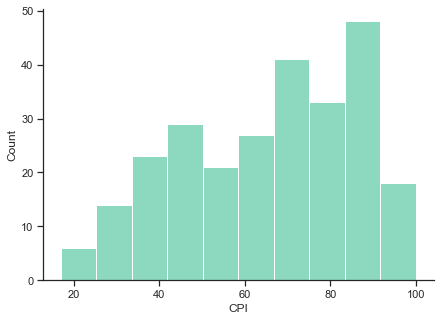

In [9]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(data_cpi_math['CPI'], color='mediumaquamarine')


/Users/derboss/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CPI'>

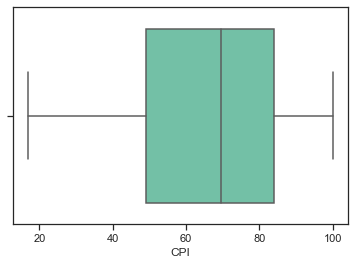

In [10]:
# box-plot
sns.boxplot(data_cpi_math['CPI'],color='mediumaquamarine')
#plt.show()

# Gini

Gini Daten wurden interpoliert.

In [12]:
#import csv file
data_gini = pd.read_csv("../../data/income_inequality.csv")
#remove useless  
# data_gini.head()
data_gini = data_gini[data_gini["SUBJECT"] == "GINI"]
data_gini = data_gini[["LOCATION", "TIME", "Value"]]
data_gini.columns = ["LOCATION", "TIME", "GINI"]
#print(data_gini.info())

data_gini = data_gini[data_gini["TIME"] >= 2000]

# In Zeitreihen verwandeln
data_gini_int = data_gini.pivot_table("GINI", "LOCATION", "TIME")

# transform back to normal df
data_gini_int.columns.name = None               #remove categories
data_gini_int = data_gini_int.reset_index()
#index to columns

data_gini_labels = data_gini_int
#print(data_gini_labels)

# turn every year column into own column entry
data_gini_int = data_gini_int.melt(id_vars='LOCATION', 
                                     var_name="TIME", value_name="GINI")
data_gini = data_gini_int
data_gini.info()
data_gini[data_gini["LOCATION"] == "BRA"].head(100)
data_gini = data_gini.astype({"TIME": int})
data_gini.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  880 non-null    object 
 1   TIME      880 non-null    object 
 2   GINI      400 non-null    float64
dtypes: float64(1), object(2)
memory usage: 20.8+ KB


,LOCATION,TIME,GINI
0,AUS,2000,NaN
1,AUT,2000,NaN
2,BEL,2000,NaN
3,BGR,2000,NaN
4,BRA,2000,NaN


In [ ]:
data_pisa_math = pd.read_csv('../../data/PISA_Raw/Pisa_Math_Raw.csv')
data_pisa_read = pd.read_csv('../../data/PISA_Raw/Pisa_Read_Raw.csv')
data_pisa_science = pd.read_csv('../../data/PISA_Raw/Pisa_Science_Raw.csv')

data_pisa_math = data_pisa_math[data_pisa_math['SUBJECT'] == 'TOT']
data_pisa_read = data_pisa_read[data_pisa_read['SUBJECT'] == 'TOT']
data_pisa_science = data_pisa_science[data_pisa_science['SUBJECT'] == 'TOT']

data_pisa_math = data_pisa_math.rename(columns = {'Value': 'PISA'})
data_pisa_read = data_pisa_read.rename(columns = {'Value': 'PISA'})
data_pisa_science = data_pisa_science.rename(columns = {'Value': 'PISA'})

data_pisa_math = data_pisa_math[['LOCATION', 'TIME', 'PISA']]
data_pisa_read = data_pisa_read[['LOCATION', 'TIME', 'PISA']]
data_pisa_science = data_pisa_science[['LOCATION', 'TIME', 'PISA']]




data2 = data_pisa_math.merge(data_gini, how="left", left_on = ['LOCATION', 'TIME'], 
                                right_on = ['LOCATION', 'TIME'])
data3 = data_pisa_read.merge(data_gini, how="left", left_on = ['LOCATION', 'TIME'], 
                                right_on = ['LOCATION', 'TIME'])
data4 = data_pisa_science.merge(data_gini, how="left", left_on = ['LOCATION', 'TIME'], 
                                right_on = ['LOCATION', 'TIME'])


print('Datenverfügbarkeit GINI/PISA Read: ')
data3.info()
print('\n')
print('Datenverfügbarkeit GINI/PISA Math: ')
data2.info()
print('\n')
print('Datenverfügbarkeit GINI/PISA Science: ')
data4.info()

In [ ]:
data_gini = data_gini.dropna()

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(data_gini['GINI'], color='mediumaquamarine')

In [ ]:
# box-plot
sns.boxplot(data_gini['GINI'],color='mediumaquamarine')

# Anteil der Bölkerung mit tertiärer Bildung

In [ ]:
data_edu_try = pd.read_csv("../../data/tertiary_edu.csv")

data_edu_try = data_edu_try[["LOCATION", "TIME", "Value"]]
data_edu_try = data_edu_try.rename(columns={"Value": "PCT_EDU_TRY"})

data_edu_try.head()

In [ ]:
data_edu_try_math = data_pisa_math.merge(data_edu_try, how="left", left_on = ['LOCATION', 'TIME'], 
                                right_on = ['LOCATION', 'TIME'])
data_edu_try_read = data_pisa_read.merge(data_edu_try, how="left", left_on = ['LOCATION', 'TIME'], 
                                right_on = ['LOCATION', 'TIME'])
data_edu_try_science = data_pisa_science.merge(data_edu_try, how="left", left_on = ['LOCATION', 'TIME'], 
                                right_on = ['LOCATION', 'TIME'])

print('Datenverfügbarkeit GINI/PISA Read: ')
data_edu_try_read.info()
print('\n')
print('Datenverfügbarkeit GINI/PISA Math: ')
data_edu_try_math.info()
print('\n')
print('Datenverfügbarkeit GINI/PISA Science: ')
data_edu_try_science.info()

In [ ]:
data_edu_try_math = data_edu_try_math.dropna()

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(data_edu_try_math['PCT_EDU_TRY'], color='mediumaquamarine')

In [ ]:
sns.boxplot(data_edu_try_math['PCT_EDU_TRY'],color='mediumaquamarine')

# Bildungsausgaben

In [ ]:
data_edu_spending = pd.read_csv("../../data/education_spending/EducationSpendingTertiär2000_2016.csv")
data_edu_spending = data_edu_spending[['LOCATION', 'TIME', 'Value']]
data_edu_spending = data_edu_spending.rename(columns = {'Value': 'EDU_SPENDING'})


data_edu_spending.head()

In [ ]:
data_internet_math = data_pisa_math.merge(data_edu_spending, how="left", left_on = ['LOCATION', 'TIME'], 
                                right_on = ['LOCATION', 'TIME'])
data_internet_read = data_pisa_read.merge(data_edu_spending, how="left", left_on = ['LOCATION', 'TIME'], 
                                right_on = ['LOCATION', 'TIME'])
data_internet_science = data_pisa_science.merge(data_edu_spending, how="left", left_on = ['LOCATION', 'TIME'], 
                                right_on = ['LOCATION', 'TIME'])

print('Datenverfügbarkeit GINI/PISA Read: ')
data_internet_read.info()
print('\n')
print('Datenverfügbarkeit GINI/PISA Math: ')
data_internet_math.info()
print('\n')
print('Datenverfügbarkeit GINI/PISA Science: ')
data_internet_science.info()

In [ ]:
data_edu_spending = data_edu_spending.dropna()

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(data_edu_spending['EDU_SPENDING'], color='mediumaquamarine')

In [ ]:
sns.boxplot(data_edu_spending['EDU_SPENDING'],color='mediumaquamarine')

# Alkoholkonsum

In [ ]:
# Import
data_alc = pd.read_csv('../../data/alcohol_consumption.csv')

In [ ]:
data_alc = data_alc[['LOCATION', 'TIME', 'Value']]
#data_alc = data_alc[data_alc['TIME'] == YEAR]
data_alc = data_alc.rename(columns = {'Value' : 'ALC_PC'})

data_alc.head()

In [ ]:
data_alc_math = data_pisa_math.merge(data_alc, how="left", left_on = ['LOCATION', 'TIME'], 
                                right_on = ['LOCATION', 'TIME'])
data_alc_read = data_pisa_read.merge(data_alc, how="left", left_on = ['LOCATION', 'TIME'], 
                                right_on = ['LOCATION', 'TIME'])
data_alc_science = data_pisa_science.merge(data_alc, how="left", left_on = ['LOCATION', 'TIME'], 
                                right_on = ['LOCATION', 'TIME'])

print('Datenverfügbarkeit GINI/PISA Read: ')
data_alc_read.info()
print('\n')
print('Datenverfügbarkeit GINI/PISA Math: ')
data_alc_math.info()
print('\n')
print('Datenverfügbarkeit GINI/PISA Science: ')
data_alc_science.info()

In [ ]:
data_alc_math = data_alc_math.dropna()

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(data_alc['ALC_PC'], color='mediumaquamarine')

In [ ]:
sns.boxplot(data_alc['ALC_PC'],color='mediumaquamarine')

# Mordrate 

In [ ]:
#import csv file
data_homicide = pd.read_csv("../../data/homicide_rate.csv")

data_homicide_int = data_homicide.iloc[:, 34:63]

data_homicde = data_homicide[["Country Code"]]

data_homicde = data_homicde.rename(columns={"Country Code": "LOCATION"})

data_homicide = pd.concat([data_homicde[["LOCATION"]], data_homicide_int]
                            , ignore_index = None, axis=1)

# # turn every year column into own column entry
data_homicide = data_homicide.melt(id_vars='LOCATION', 
                                     var_name="TIME",value_name="HOMICIDES")
# typecast; otherwise no merging possible
data_homicide.TIME = data_homicide.TIME.apply(pd.to_numeric)

# data_homicide_int.info()
# data_homicide_int.head()
#data_homicide.info()
#data_homicide.head()

In [ ]:
data_homicide_math = data_pisa_math.merge(data_homicide, how="left", left_on = ['LOCATION', 'TIME'], 
                                right_on = ['LOCATION', 'TIME'])
data_homicide_read = data_pisa_read.merge(data_homicide, how="left", left_on = ['LOCATION', 'TIME'], 
                                right_on = ['LOCATION', 'TIME'])
data_homicide_science = data_pisa_science.merge(data_homicide, how="left", left_on = ['LOCATION', 'TIME'], 
                                right_on = ['LOCATION', 'TIME'])

print('Datenverfügbarkeit GINI/PISA Read: ')
data_homicide_read.info()
print('\n')
print('Datenverfügbarkeit GINI/PISA Math: ')
data_homicide_math.info()
print('\n')
print('Datenverfügbarkeit GINI/PISA Science: ')
data_homicide_science.info()

In [ ]:
data_alc_math = data_alc_math.dropna()

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(data_homicide_read['HOMICIDES'], color='mediumaquamarine')

In [ ]:
sns.boxplot(data_homicide_read['HOMICIDES'],color='mediumaquamarine')

# Anteil der Werte, die nach der Interpolation gefüllt wurden

In [ ]:
data = pd.read_csv('../../data/all_nan.csv')
data.info()